<a href="https://colab.research.google.com/github/sprashant19/Chennai-House-Price-Prediction/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
data=pd.read_csv("/content/train-chennai-sale.csv")
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


Adding a new column as Total_Price, that is the sum of REG_FEE,COMMIS and SALES_PRICE.Also deleting the REG_FEE,COMMIS and SALES_PRICE columns, because after addition of a new column as Total_Price,these columns have become redundant.



In [ ]:
Total_Price=data["REG_FEE"]+data["COMMIS"]+data["SALES_PRICE"]
data["Total_Price"]=Total_Price

In [ ]:
dataset=data.drop(columns=["REG_FEE","COMMIS","SALES_PRICE"])
dataset

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Total_Price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5668827
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,11370222
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8835792
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,9051448


In [ ]:
dataset.shape

(7109, 20)

In [ ]:
dataset.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'Total_Price'],
      dtype='object')

In [ ]:
dataset.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
Total_Price        int64
dtype: object

Data Cleaning

In [ ]:
dataset.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
Total_Price       0
dtype: int64

AREA

In [ ]:
#Cleaning the Area column
dataset.AREA.unique()
dataset['AREA']=dataset['AREA'].replace({'Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Adyr':'Adyar','Velchery':'Velachery','Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Ana Nagar':'Anna Nagar','KKNagar':'KK Nagar','TNagar':'T Nagar'})

DATE_SALE

In [ ]:
dataset.DATE_SALE.isna().sum()

0

In [ ]:
#The data type of DATE_SALE is in object fromat,we need to convert it into date time fromat
dataset.DATE_SALE=pd.to_datetime(dataset.DATE_SALE,format='%d-%m-%Y')
dataset.DATE_SALE

0      2011-05-04
1      2006-12-19
2      2012-02-04
3      2010-03-13
4      2009-10-05
          ...    
7104   2011-01-03
7105   2004-04-08
7106   2006-08-25
7107   2009-08-03
7108   2005-07-13
Name: DATE_SALE, Length: 7109, dtype: datetime64[ns]

N_BEDROOM

In [ ]:
dataset.N_BEDROOM.isna().sum()

1

In [ ]:
#Since N_BEDROOM has only 1 null values we can drop that row.
dataset=dataset.dropna(subset=['N_BEDROOM'])
dataset.N_BEDROOM.isna().sum()

0

In [ ]:
dataset.N_BATHROOM.isna().sum()

5

In [ ]:
#N_BATHROOM got only 5 null values we can drop this also
dataset=dataset.dropna(subset=['N_BATHROOM'])
dataset.N_BATHROOM.isna().sum()

0

In [ ]:
#N_BEDROOM and N_BATHROOM are in float format, number of Bedroom and number of bathroom can only be in Integer format, Hence we are converting it into int64 format.
dataset.N_BATHROOM=dataset.N_BATHROOM.astype('int64')
dataset.N_BEDROOM=dataset.N_BEDROOM.astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset.N_ROOM.isna().sum()

0

SALE_COND

In [ ]:
dataset.SALE_COND.isna().sum()
dataset.SALE_COND.unique()     #SALE_COND has many mis-spelled name in the column, we need to replace them with correct name.
dataset["SALE_COND"]=dataset["SALE_COND"].replace({'Ab Normal':'AbNormal','Partiall':'Partial','Adj Land':'AdjLand','PartiaLl':'Partial'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

PARK_FACIL

In [ ]:
dataset.PARK_FACIL.isna().sum()        #PARK_FACIL has no null values
dataset.PARK_FACIL.unique()          

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
#PARK_FACIL has got value of "Noo", we have to replace it with 'No'.
dataset['PARK_FACIL']=dataset['PARK_FACIL'].replace({'Noo':'No'})
dataset['PARK_FACIL'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Yes', 'No'], dtype=object)

DATE_BUILD

In [ ]:
dataset.DATE_BUILD   #DATE_BUILD has object as its format,we have to convert this into datetime format

0       15-05-1967
1       22-12-1995
2       09-02-1992
3       18-03-1988
4       13-10-1979
           ...    
7104    15-01-1962
7105    11-04-1995
7106    01-09-1978
7107    11-08-1977
7108    24-07-1961
Name: DATE_BUILD, Length: 7103, dtype: object

In [ ]:
dataset.DATE_BUILD=pd.to_datetime(dataset.DATE_BUILD,format='%d-%m-%Y')     #DATE_BUILD converted to datetime fromat
dataset.DATE_BUILD

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      1967-05-15
1      1995-12-22
2      1992-02-09
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-04-11
7106   1978-09-01
7107   1977-08-11
7108   1961-07-24
Name: DATE_BUILD, Length: 7103, dtype: datetime64[ns]

BUILDTYPE

In [ ]:
dataset.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
#Correcting the wrong spelling in th BUILDTYPE column
dataset['BUILDTYPE']=dataset['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})
dataset.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

UTILITY_AVAIL

In [ ]:
dataset.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
#Correcting the spelling in the column
dataset['UTILITY_AVAIL']=dataset['UTILITY_AVAIL'].replace({'All Pub':'AllPub','NoSeWa':'NoSewr','NoSewr ':'NoSewr'})
dataset.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

STREET

In [ ]:
dataset.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
dataset['STREET']=dataset['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'})
dataset.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

QS_OVERALL

In [ ]:
dataset.QS_OVERALL.isna().sum()

47

In [ ]:
dataset=dataset.dropna(subset=["QS_OVERALL"])

In [ ]:
dataset.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
Total_Price      0
dtype: int64

DATE_SALE and DATE_BUILD can be used to get the building age, it can be a better feature to predict the price.

In [ ]:
dataset['BUILD_YEAR']=pd.DatetimeIndex(dataset['DATE_BUILD']).year
dataset['SALE_YEAR']=pd.DatetimeIndex(dataset['DATE_SALE']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
House_age=dataset["SALE_YEAR"]-dataset["BUILD_YEAR"]
#years=House_age//365
dataset["House_age"]=House_age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Total_Price,BUILD_YEAR,SALE_YEAR,House_age
0,P03210,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,8124400,1967,2011,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,22781941,1995,2006,11
2,P01812,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,13672408,1992,2012,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,10063653,1988,2010,22
4,P06210,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,7717313,1979,2009,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-01-03,51,1,1,2,AdjLand,No,...,No Access,RM,3.0,2.2,2.4,2.520,5668827,1962,2011,49
7105,P10000,Velachery,1897,2004-04-08,52,3,2,5,Family,Yes,...,No Access,RH,3.6,4.5,3.3,3.920,11370222,1995,2004,9
7106,P09594,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,...,Gravel,I,4.3,4.2,2.9,3.840,8835792,1978,2006,28
7107,P06508,Karapakkam,787,2009-08-03,40,1,1,2,Partial,Yes,...,Paved,RL,4.6,3.8,4.1,4.160,9051448,1977,2009,32


Dropping DATE_SALE,DATE_BUILD,PRT_ID,BUILD_YEAR,SALE_YEAR from the dataset.

In [ ]:
df=dataset.drop(columns=["DATE_SALE","DATE_BUILD","PRT_ID","SALE_YEAR","BUILD_YEAR"])

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'Total_Price', 'House_age'],
      dtype='object')

In [ ]:
df.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Total_Price,House_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,11


Shifting the Total_Price Column to the left end for ease.

In [ ]:
column=df.pop('Total_Price')
df.insert(0,'Total_Price',column)
df

,Total_Price,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_age
0,8124400,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,44
1,22781941,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,11
2,13672408,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20
3,10063653,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,22
4,7717313,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,5668827,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,49
7105,11370222,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSewr,No Access,RH,3.6,4.5,3.3,3.920,9
7106,8835792,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSewr,Gravel,I,4.3,4.2,2.9,3.840,28
7107,9051448,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,32


**Plotting**

Distribution plot for every Columns

In [ ]:
fig1=px.histogram(df,x="AREA",color="AREA",title="<b>Distribution of Area data")
fig1

In the AREA column,Chrompet has got the most data points and T Nagar has got the least data points.

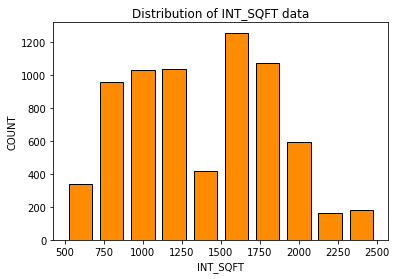

In [ ]:
#Fig2
plt.hist(df["INT_SQFT"],COLOR='darkorange',edgecolor='black',rwidth=0.75)
plt.xlabel("INT_SQFT")
plt.ylabel("COUNT")
plt.title("Distribution of INT_SQFT data")
plt.show()

In the INT_SQFT column, values ranging between 1500 and 1700 has most number of data points whereas values ranging between 2200 and 2300 has least number of data points.

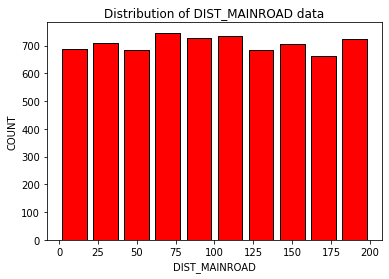

In [ ]:
#Fig3
plt.hist(df["DIST_MAINROAD"],edgecolor='black',color='red',rwidth=0.8)
plt.xlabel("DIST_MAINROAD")
plt.ylabel("COUNT")
plt.title("Distribution of DIST_MAINROAD data")
plt.show()

In the DIST_MAINROAD column, values ranging between 50-100 has most number of data points whereas value more than 200 has the least number of data points.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



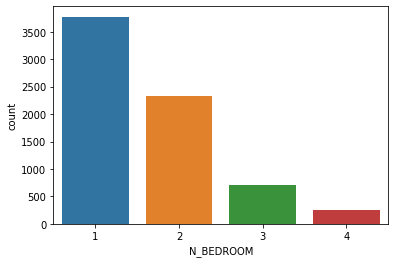

In [ ]:
fig4=sns.countplot(df["N_BEDROOM"])
fig4


In the N_BEDROOM column, the value of 1 number of Bedroom got the most number of data points whereas,value 4 number of bedroom got the least number of data points.

In [ ]:
x=df["N_BATHROOM"].value_counts()
y=df["N_BATHROOM"].unique()
fig5=go.Figure(data=[go.Pie(values=x,labels=y,text=y,title="<b>Distribution of N_BATHROOM data")])
fig5.show()

N_BATHROOM column got value of 1 number of bathroom as most of the data points, whereas value of 2 number of bathrooms has the least number of data points. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



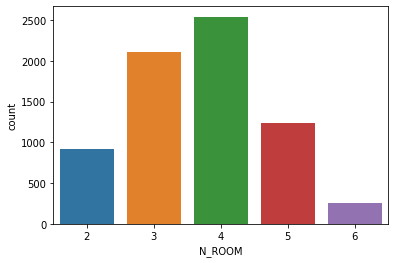

In [ ]:
fig6=sns.countplot(df["N_ROOM"])
fig6

N_ROOM column got 4 rooms as the most of the data points, whereas 6 rooms has got least number of data points.

In [ ]:
x=df["SALE_COND"].value_counts()
y=df["SALE_COND"].unique()
fig7=go.Figure(data=[go.Pie(values=x,labels=y,text=y,title="<b>Distribution of SALE_COND data")])
fig7.show()

In the SALE_COND column,"AbNormal" SALE_COND has got the most number of data points and "Noraml Sale" has got  the least number of data points.

In [ ]:
x=df["PARK_FACIL"].value_counts()
y=df["PARK_FACIL"].unique()
fig8=go.Figure(data=[go.Pie(values=x,labels=y,text=y,title="<b>Distribution of PARK_FACIL data")])
fig8.show()

The data contains more number of Yes as a data points in the 	PARK_FACIL column than the No.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



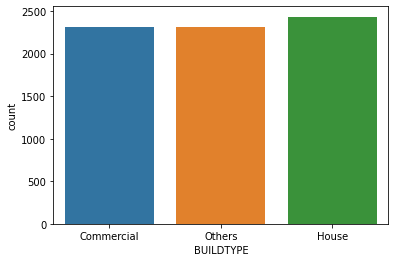

In [ ]:
fig9=sns.countplot(df["BUILDTYPE"])
fig9

In the provided data the column BUILDTYPE has got "House" as the most number of data points than others or Commercial.

In [ ]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

In [ ]:
value=df["UTILITY_AVAIL"].value_counts()
label=df["UTILITY_AVAIL"].unique()
fig10=go.Figure(data=[go.Pie(values=value,labels=label,text=label,title="<b>Distribution of UTILITY_AVAIL data")])
fig10.show()


In the UTILITY_AVAIL column,"AllPub got the most of the data points whereas "NoSewr" got the least number of data points.

In [ ]:
#fig11
value=df["STREET"].value_counts()
label=df["STREET"].unique()
fig11=go.Figure(data=[go.Pie(values=value,labels=label,text=label,title="<b>Distribution of STREET data")])
fig11.show()

The STREET column, has got "Paved" as most data points(36.2%) and "No Access" as the least data points as least data points in the data.

In [ ]:
value=df["MZZONE"].value_counts()
label=df["MZZONE"].unique()
fig12=go.Figure(data=[go.Pie(values=value,labels=label,text=label,title="<b>Distribution of MZZONE data")])
fig12.show()

In the MZZONE column,"A" has got the most number of data points and "RM" has got the least number of data points in our data.

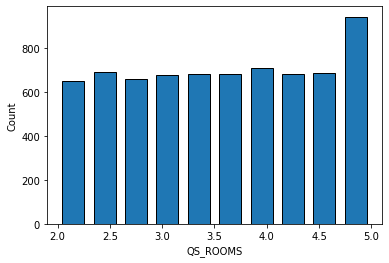

In [ ]:
#Fig13
plt.hist(df["QS_ROOMS"],edgecolor='black',rwidth=0.7)
plt.xlabel("QS_ROOMS")
plt.ylabel("Count")
plt.show()

The column QS_ROOMS values between 4.8 and 5.0 has the most data points in the data and values between 4.1 and 4.4 has least data points in our data.

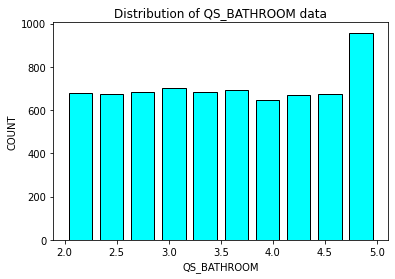

In [ ]:
#Fig14
plt.hist(df["QS_BATHROOM"],color='cyan',edgecolor='black',rwidth=0.75)
plt.xlabel("QS_BATHROOM")
plt.ylabel("COUNT")
plt.title("Distribution of QS_BATHROOM data")
plt.show()

In coloumn QS_BATHROOM, the value between 4.7 and 5.0 has most of the data points and value between 3.8 and 4.2 has least number of data points. 

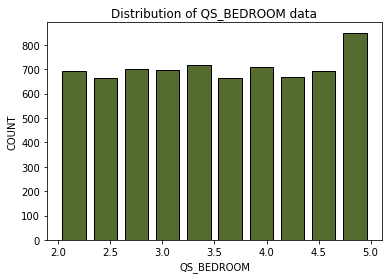

In [ ]:
#Fig15
plt.hist(df["QS_BEDROOM"],color='darkolivegreen',edgecolor='black',rwidth=0.75)
plt.xlabel("QS_BEDROOM")
plt.ylabel("COUNT")
plt.title("Distribution of QS_BEDROOM data")
plt.show()

In the column QS_BEDROOM,the value in the range between 4.8 and 5.0 has the most of the data points and value in the range between 4.2 and 4.4 has least number of data points.

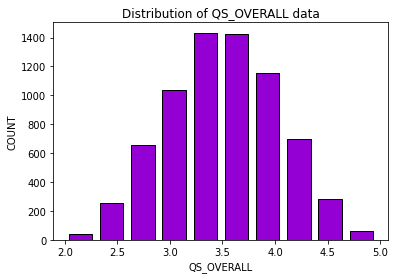

In [ ]:
#Fig16
plt.hist(df["QS_OVERALL"],color='darkviolet',edgecolor='black',rwidth=0.75)
plt.xlabel("QS_OVERALL")
plt.ylabel("COUNT")
plt.title("Distribution of QS_OVERALL data")
plt.show()

In the column QS_OVERALL,the value in the range between 3.2 and 3.4 has the most of the data points and value in the range between 2.1 and 2.4 has least number of data points.

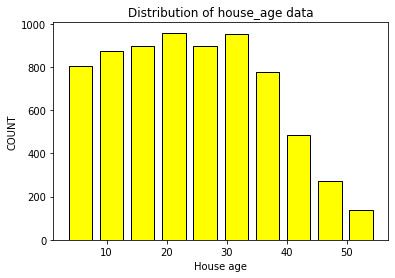

In [ ]:
#df.House_age=df.House_age.astype('int64')
plt.hist(df["House_age"],color='yellow',edgecolor='black',rwidth=0.75)
plt.xlabel("House age")
plt.ylabel("COUNT")
plt.title("Distribution of house_age data")
plt.show()

**Feature VS Target plotting**

Total_Price VS AREA

In [ ]:
df.columns

Index(['Total_Price', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'House_age'],
      dtype='object')

In [ ]:
fig=px.histogram(df,x="AREA",y="Total_Price",color="AREA",title="<b>Sum of total price VS AREA")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig

From the above figure we can conclude there is some linear relationship between sum of Total_price and AREA.

Total_Price VS INT_SQFT

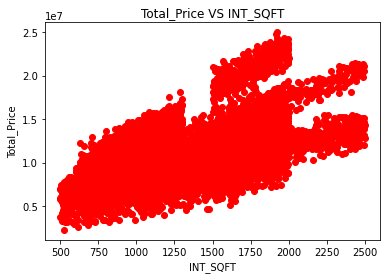

In [ ]:
plt.scatter(df["INT_SQFT"],df["Total_Price"],color='red')
plt.xlabel("INT_SQFT")
plt.ylabel("Total_Price")
plt.title("Total_Price VS INT_SQFT")
plt.show()

The above figure depicts that, there is some kind of linear relation between Total_Price and INT_SQFT.

In [ ]:
df.columns

Index(['Total_Price', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'House_age'],
      dtype='object')

Total_Price VS DIST_MAINROAD

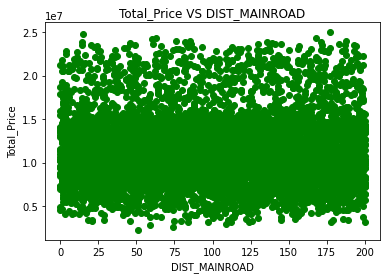

In [ ]:
plt.scatter(df["DIST_MAINROAD"],df["Total_Price"],color='green')
plt.xlabel("DIST_MAINROAD")
plt.ylabel("Total_Price")
plt.title("Total_Price VS DIST_MAINROAD")
plt.show()

In [ ]:
fig=px.histogram(df,x="N_BEDROOM",y="Total_Price",color="N_BEDROOM",title="<b>Total_Price VS N_BEDROOM")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig

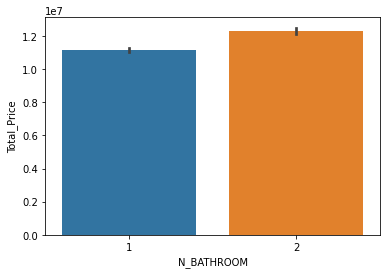

In [ ]:
sns.barplot(x=df["N_BATHROOM"],y=df["Total_Price"])

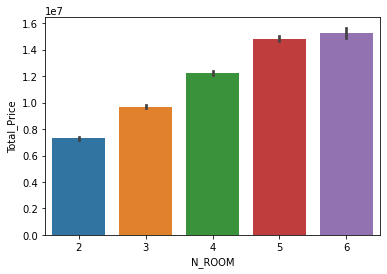

In [ ]:
sns.barplot(x=df["N_ROOM"],y=df["Total_Price"])

In [ ]:
fig=px.histogram(df,x="SALE_COND",y="Total_Price",color="SALE_COND",title="<b>Total_Price VS SALE_COND")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig

In [ ]:
fig=px.histogram(df,x="PARK_FACIL",y="Total_Price",color="PARK_FACIL",title="<b>Total_Price VS SALE_COND")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig

In [ ]:
fig=px.histogram(df,x="BUILDTYPE",y="Total_Price",color="BUILDTYPE",title="<b>Total_Price VS SALE_COND")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig

In [ ]:
fig=px.histogram(df,x="UTILITY_AVAIL",y="Total_Price",color="UTILITY_AVAIL",title="<b>Total_Price VS UTILITY_AVAIL")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig

In [ ]:
fig=px.histogram(df,x="STREET",y="Total_Price",color="STREET",title="<b>Total_Price VS SALE_COND")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig

In [ ]:
fig=px.histogram(df,x="MZZONE",y="Total_Price",color="MZZONE",title="<b>Total_Price VS MZZONE")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig

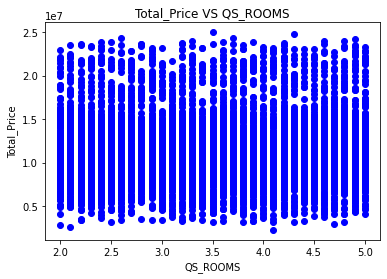

In [ ]:
plt.scatter(df["QS_ROOMS"],df["Total_Price"],color='blue')
plt.xlabel("QS_ROOMS")
plt.ylabel("Total_Price")
plt.title("Total_Price VS QS_ROOMS")
plt.show()

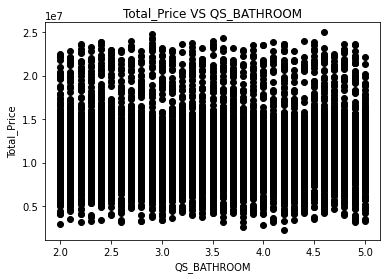

In [ ]:
plt.scatter(df["QS_BATHROOM"],df["Total_Price"],color='black')
plt.xlabel("QS_BATHROOM")
plt.ylabel("Total_Price")
plt.title("Total_Price VS QS_BATHROOM")
plt.show()

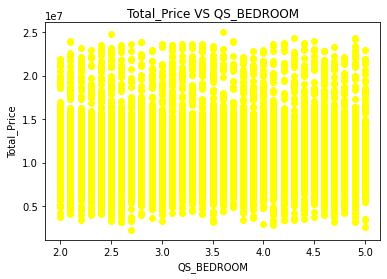

In [ ]:
plt.scatter(df["QS_BEDROOM"],df["Total_Price"],color='yellow')
plt.xlabel("QS_BEDROOM")
plt.ylabel("Total_Price")
plt.title("Total_Price VS QS_BEDROOM")
plt.show()

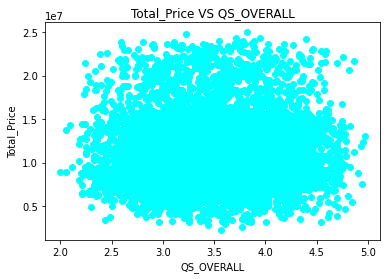

In [ ]:
plt.scatter(df["QS_OVERALL"],df["Total_Price"],color='CYAN')
plt.xlabel("QS_OVERALL")
plt.ylabel("Total_Price")
plt.title("Total_Price VS QS_OVERALL")
plt.show()

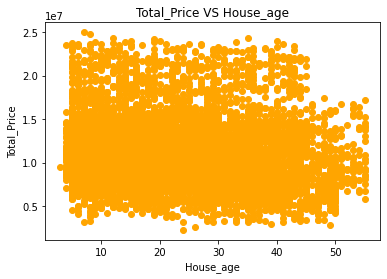

In [ ]:
plt.scatter(df["House_age"],df["Total_Price"],color='orange')
plt.xlabel("House_age")
plt.ylabel("Total_Price")
plt.title("Total_Price VS House_age")
plt.show()

In [ ]:
df.columns

Index(['Total_Price', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'House_age'],
      dtype='object')

In [ ]:
df

,Total_Price,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_age
0,8124400,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,44
1,22781941,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,11
2,13672408,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20
3,10063653,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,22
4,7717313,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,5668827,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,49
7105,11370222,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSewr,No Access,RH,3.6,4.5,3.3,3.920,9
7106,8835792,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSewr,Gravel,I,4.3,4.2,2.9,3.840,28
7107,9051448,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,32


Data Encoding

AREA column Encoding

In [ ]:
df["AREA"]=df["AREA"].map({"Chrompet":1,"KK Nagar":2,"Anna Nagar":3,"Velachery":4,"Karapakkam":5,"T Nagar":6,"Adyar":7})
df

,Total_Price,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_age
0,8124400,5,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,44
1,22781941,3,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,11
2,13672408,7,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,20
3,10063653,4,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,22
4,7717313,5,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,5668827,5,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,49
7105,11370222,4,1897,52,3,2,5,Family,Yes,Others,NoSewr,No Access,RH,3.6,4.5,3.3,3.920,9
7106,8835792,4,1614,152,2,1,4,Normal Sale,No,House,NoSewr,Gravel,I,4.3,4.2,2.9,3.840,28
7107,9051448,5,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,32


In [ ]:
df["AREA"].unique()

array([5, 3, 7, 4, 1, 2, 6])

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
#df["AREA"]=le.fit_transform(df["AREA"])
df['SALE_COND']=le.fit_transform(df["SALE_COND"])
df['MZZONE']=le.fit_transform(df["MZZONE"])
df['UTILITY_AVAIL']=le.fit_transform(df["UTILITY_AVAIL"])
df['BUILDTYPE']=le.fit_transform(df["BUILDTYPE"])
df['PARK_FACIL']=le.fit_transform(df["PARK_FACIL"])
df['STREET']=le.fit_transform(df["STREET"])

In [ ]:
df

,Total_Price,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_age
0,8124400,5,1004,131,1,1,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,44
1,22781941,3,1986,26,2,1,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,11
2,13672408,7,909,70,1,1,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,20
3,10063653,4,1855,14,3,2,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,22
4,7717313,5,1226,84,1,1,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,5668827,5,598,51,1,1,2,1,0,2,1,1,5,3.0,2.2,2.4,2.520,49
7105,11370222,4,1897,52,3,2,5,2,1,2,2,1,3,3.6,4.5,3.3,3.920,9
7106,8835792,4,1614,152,2,1,4,3,0,1,2,0,2,4.3,4.2,2.9,3.840,28
7107,9051448,5,787,40,1,1,2,4,1,0,1,2,4,4.6,3.8,4.1,4.160,32


**Linear Regression Model**

Preparing the Data

Data Transformation

In [ ]:
#AREA Tramsformation
#df["AREATRANS"]=np.power(df["AREA"],3)      
#DIST_MAINROAD Transformation
df['DIST_MAINROADTRANS']=np.square(df['DIST_MAINROAD'])   
#N_BEDROOM Transformation
df["N_BEDROOMTRANS"]=np.square(df["N_BEDROOM"])           
#N_BATHROOM Transformation
df["N_BATHROOMTRANS"]=np.square(df["N_BATHROOM"])           
#N_ROOM Transformation
df["N_ROOMTRANS"]=np.square(df["N_ROOM"])           
#SALE_COND Transformation
df["SALE_CONDTRANS"]=np.square(df["SALE_COND"])           
#BUILDTYPE Transformation
df["BUILDTYPETRANS"]=np.square(df["BUILDTYPE"])           
#UTILITY_AVAIL Transformation
df["UTILITY_AVAILTRANS"]=np.square(df["UTILITY_AVAIL"])           
#STREET Transformation
df["STREETTRANS"]=np.square(df["STREET"])           
#MZZONE Transformation
df["MZZONETRANS"]=np.square(df["MZZONE"])           
#QS_ROOMS Transformation
df["QS_ROOMSTRANS"]=np.sqrt(df["QS_ROOMS"])
#QS_BATHROOM Transformation
df["QS_BATHROOMTRANS"]=np.exp(df["QS_BATHROOM"])          
#QS_BEDROOM Transformation
df["QS_BEDROOMTRANS"]=np.sqrt(df["QS_BEDROOM"])           
#QS_OVERALL Transformation
df["QS_OVERALLTRANS"]=np.square(df["QS_OVERALL"]) 
#House_age Transformation
df["House_ageTrans"]=np.power(df["House_age"],3)      

df[['AREA','DIST_MAINROADTRANS', 'N_BEDROOMTRANS','N_BATHROOMTRANS', 'N_ROOMTRANS', 'SALE_CONDTRANS','BUILDTYPETRANS','UTILITY_AVAILTRANS', 'STREETTRANS', 'MZZONETRANS', 'QS_ROOMSTRANS', 'QS_BATHROOMTRANS','QS_BEDROOMTRANS', 'QS_OVERALLTRANS', 'House_ageTrans','Total_Price']].corr()

,AREA,DIST_MAINROADTRANS,N_BEDROOMTRANS,N_BATHROOMTRANS,N_ROOMTRANS,SALE_CONDTRANS,BUILDTYPETRANS,UTILITY_AVAILTRANS,STREETTRANS,MZZONETRANS,QS_ROOMSTRANS,QS_BATHROOMTRANS,QS_BEDROOMTRANS,QS_OVERALLTRANS,House_ageTrans,Total_Price
AREA,1.000000,0.018024,-0.150850,0.051834,-0.093255,-0.026624,0.009792,-0.033522,-0.013234,-0.330394,-0.002709,-0.010191,0.010888,-0.000359,0.159581,-0.118614
DIST_MAINROADTRANS,0.018024,1.000000,0.003446,0.004443,0.009047,0.004370,-0.012616,-0.000534,0.008775,0.000015,0.003424,-0.032206,-0.001127,-0.022489,-0.003379,0.021059
N_BEDROOMTRANS,-0.150850,0.003446,1.000000,0.755653,0.861641,0.007882,-0.000938,0.045673,0.040861,0.057094,0.015493,-0.008962,0.015047,0.012325,-0.031844,0.324845
N_BATHROOMTRANS,0.051834,0.004443,0.755653,1.000000,0.600439,0.001327,-0.008784,0.033212,0.010482,-0.044534,0.013999,-0.012704,0.012532,0.007835,0.012058,0.120698
N_ROOMTRANS,-0.093255,0.009047,0.861641,0.600439,1.000000,0.011091,-0.005479,0.034776,0.028865,0.144792,0.017014,-0.010963,0.016588,0.014987,-0.017168,0.593612
SALE_CONDTRANS,-0.026624,0.004370,0.007882,0.001327,0.011091,1.000000,-0.012586,0.002676,0.003478,0.018941,-0.001248,-0.003767,-0.005378,-0.004854,-0.014934,-0.034720
BUILDTYPETRANS,0.009792,-0.012616,-0.000938,-0.008784,-0.005479,-0.012586,1.000000,0.009629,0.000133,-0.014228,0.003386,0.004880,-0.000822,0.007096,-0.003446,-0.322944
UTILITY_AVAILTRANS,-0.033522,-0.000534,0.045673,0.033212,0.034776,0.002676,0.009629,1.000000,0.015065,0.019773,0.011274,-0.000491,0.011676,0.012350,-0.011905,-0.007593
STREETTRANS,-0.013234,0.008775,0.040861,0.010482,0.028865,0.003478,0.000133,0.015065,1.000000,0.004624,0.014412,0.010604,-0.012044,0.010162,-0.006938,-0.001337
MZZONETRANS,-0.330394,0.000015,0.057094,-0.044534,0.144792,0.018941,-0.014228,0.019773,0.004624,1.000000,0.001315,-0.016662,0.008088,-0.001994,-0.131086,0.394316


In [ ]:
x=df[['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROADTRANS', 'N_BEDROOMTRANS','N_BATHROOMTRANS', 'N_ROOMTRANS', 'SALE_CONDTRANS','BUILDTYPETRANS','UTILITY_AVAILTRANS', 'STREETTRANS', 'MZZONETRANS', 'QS_ROOMSTRANS', 'QS_BATHROOMTRANS','QS_BEDROOMTRANS', 'QS_OVERALLTRANS', 'House_ageTrans']].values
y=df["Total_Price"].values

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Scaling or Normalizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Model training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(regressor.coef_,['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'House_age'],columns=['Coefficient'])
y_pred=regressor.predict(x_test_scaled)
coeff_df

,Coefficient
AREA,2.100933e+04
INT_SQFT,1.149571e+06
DIST_MAINROAD,5.671107e+05
N_BEDROOM,5.009612e+04
N_BATHROOM,-1.855264e+06
N_ROOM,-4.542764e+05
SALE_COND,2.973980e+06
PARK_FACIL,-1.791972e+05
BUILDTYPE,-1.235751e+06
UTILITY_AVAIL,-8.018207e+04


In [ ]:
regressor.intercept_

11382808.457482986

In [ ]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,7372418,1.004143e+07
1,11299387,1.440547e+07
2,8876485,8.208515e+06
3,4752189,7.082082e+06
4,4869376,8.556411e+06
...,...,...
1759,13200560,1.175104e+07
1760,7489941,1.178375e+07
1761,6728976,7.529599e+06
1762,7803840,9.178838e+06


In [ ]:
#Evaluation Metrics
from sklearn import metrics
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared Error : ",metrics.mean_squared_error(y_test,y_pred))
print("R2 Score : ",metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  1779030.4276292152
Mean squared Error :  4681705093101.688
R2 Score :  0.7077536392471682


R2 Score of 0.77 is a good model,still lets see the R2 score for other model also.

Feature Selection------->Sequential Feature Selector

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator=LinearRegression()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=4)
sfs.fit(x_train_scaled,y_train)
print(list(zip(['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROADTRANS', 'N_BEDROOMTRANS','N_BATHROOMTRANS', 'N_ROOMTRANS', 'SALE_CONDTRANS','BUILDTYPETRANS','UTILITY_AVAILTRANS', 'STREETTRANS', 'MZZONETRANS', 'QS_ROOMSTRANS', 'QS_BATHROOMTRANS','QS_BEDROOMTRANS', 'QS_OVERALLTRANS', 'House_ageTrans'],sfs.get_support())))

[('AREA', False), ('INT_SQFT', True), ('PARK_FACIL', False), ('DIST_MAINROADTRANS', False), ('N_BEDROOMTRANS', False), ('N_BATHROOMTRANS', True), ('N_ROOMTRANS', False), ('SALE_CONDTRANS', False), ('BUILDTYPETRANS', True), ('UTILITY_AVAILTRANS', False), ('STREETTRANS', False), ('MZZONETRANS', True), ('QS_ROOMSTRANS', False), ('QS_BATHROOMTRANS', False), ('QS_BEDROOMTRANS', False), ('QS_OVERALLTRANS', False), ('House_ageTrans', False)]


According to the Feature selection, 'INT_SQFT',N_BATHROOMTRANS,BUILDTYPETRANS,MZZONETRANS considering only 4
 feature are the best features to predict the Total_price of house in Chennai.

**Logistic Regression Model**

Preparing the Data

In [ ]:
x=df[['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age']].values
y=df["Total_Price"].values

splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Scaling or Normalizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
#Predicting the Model
log_reg.predict_log_proba(x_test_scaled)

array([[ -7.03783461,  -7.72472746,  -5.73387333, ..., -13.30344555,
        -13.25018027, -12.78967949],
       [ -9.0749607 ,  -9.11132082,  -7.15789488, ..., -11.90781446,
        -12.82971474, -10.57048697],
       [-13.99230926, -13.23608823, -12.34604895, ...,  -7.57580955,
         -6.76702283,  -7.9902119 ],
       ...,
       [-14.35377088, -15.24379932, -12.15169268, ...,  -9.42809711,
         -7.96156145, -10.63336005],
       [ -6.59574014,  -9.82863704,  -6.74789863, ..., -11.67140455,
        -11.78994198, -11.31761151],
       [-13.92512696, -12.56091317,  -9.98826824, ..., -10.05039589,
        -12.57642357, -11.58234335]])

In [ ]:
y_predlog=log_reg.predict(x_test_scaled)
y_predlog

array([ 4676868,  5106748, 16373928, ..., 16738397,  9127102, 11394541])

In [ ]:
log_reg.coef_

array([[ 0.08061449, -0.8334812 , -0.48555393, ..., -0.44286483,
         0.0511449 , -0.0385226 ],
       [ 0.1104198 , -0.58261114, -0.51100112, ...,  0.40430764,
        -0.05522456,  0.98231943],
       [ 0.08076173, -0.4910948 , -0.51289954, ..., -0.01782979,
         0.27177841,  0.30641172],
       ...,
       [ 0.70992655,  0.46845095,  0.50417967, ...,  0.43116663,
         0.37348851, -0.53556007],
       [-0.1026318 ,  0.48597031,  0.47999968, ..., -0.57088046,
        -0.19049336, -0.69327748],
       [ 0.71476874,  0.46290957,  0.47208395, ...,  0.04098836,
         0.23189451, -0.71541123]])

In [ ]:
log_reg.intercept_

array([-0.3623994 , -0.5845362 ,  0.20367834, ...,  0.19652521,
       -0.21107905, -0.12627725])

In [ ]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_predlog})
df2

,Actual,Predicted
0,4245626,4676868
1,5687644,5106748
2,17559459,16373928
3,8368365,9997277
4,23600457,21369043
...,...,...
1759,7116186,5740622
1760,9777520,8964534
1761,16826576,16738397
1762,7978642,9127102


In [ ]:
#Evaluation Metrics
from sklearn import metrics
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_predlog))
print("Mean squared Error : ",metrics.mean_squared_error(y_test,y_predlog))
print("R2 Score : ",metrics.r2_score(y_test,y_predlog))
                                           

Mean Absolute Error :  1827604.9160997733
Mean squared Error :  7163915914869.023
R2 Score :  0.5615860104312531


R2 score of 0.542 for Logistic Regression shows that it is not a good model for our data.

Feature Importance

In [ ]:
from sklearn.feature_selection import RFE
estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x_train_scaled,y_train)
list(zip(['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age'],selector.support_))

[('AREA', False),
 ('INT_SQFT', True),
 ('PARK_FACIL', False),
 ('DIST_MAINROAD', True),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('BUILDTYPE', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', True),
 ('QS_OVERALL', False),
 ('House_age', True)]

'INT_SQFT','DIST_MAINROAD','QS_BEDROOM,'House_age' are important features to predict Total_Price of the house considering the Random Forest model.

**K-Nearest Neighbour Model**

Preparing the Data

In [ ]:
x=df[['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age']].values
y=df["Total_Price"].values

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Model Training

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_predknn=knn.predict(x_test)
y_pred

array([10041427.12094466, 14405473.26504814,  8208515.23194032, ...,
        7529598.79471992,  9178838.24059723, 11726153.55465862])

In [ ]:
df3=pd.DataFrame({'Actual':y_test,'Predicted':y_predknn})
df3

,Actual,Predicted
0,11384038,14176690.0
1,9086500,13406414.0
2,13523837,14176690.0
3,9270771,14176690.0
4,8809964,14176690.0
...,...,...
1759,11866760,14176690.0
1760,4485668,14176690.0
1761,20008348,14176690.0
1762,13956947,14176690.0


In [ ]:
#Evaluation Metrics
from sklearn import metrics
print("R2 Score : ",metrics.r2_score(y_test,y_predknn))

R2 Score :  -0.5643373947709842


R2 score of -0.5538 shows this is a worst model.

Feature Importance

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator=KNeighborsRegressor()
sfs=SequentialFeatureSelector(estimator,n_features_to_select=4)
sfs.fit(x_train_scaled,y_train)
print(list(zip(['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age'],sfs.get_support())))


[('AREA', True), ('INT_SQFT', True), ('PARK_FACIL', False), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', True), ('QS_ROOMS', False), ('QS_BATHROOM', False), ('QS_BEDROOM', False), ('QS_OVERALL', False), ('House_age', False)]


'AREA',INT_SQFT','BUILDTYPE','MZZONE' are important features considering the KNN Model.

**Decision Tree Model**

Preparing the Data

In [ ]:
x=df[['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age']].values
y=df["Total_Price"].values

Splitting the Data 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Splitting is not strictly required in Decision Tree Models, so using x_train and x_test data.

Model Training

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=3)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_preddtr=dtr.predict(x_test)
y_preddtr

array([ 6479582.19662921,  9032544.60533516, 12438526.29254571, ...,
       18668069.53101362,  8593096.13380282, 18668069.53101362])

In [ ]:
df4=pd.DataFrame({'Actual':y_test,'Predicted':y_preddtr})
df4

,Actual,Predicted
0,5084888,6.479582e+06
1,7053637,9.032545e+06
2,13214080,1.243853e+07
3,5989214,6.479582e+06
4,9246864,9.032545e+06
...,...,...
1759,14158522,1.251505e+07
1760,11041291,9.032545e+06
1761,19444555,1.866807e+07
1762,10121584,8.593096e+06


In [ ]:
#Evaluation Metrics
from sklearn import metrics
print("R2 Score : ",metrics.r2_score(y_test,y_preddtr))

R2 Score :  0.7725322025436183


R2 score of 0.77 shows that it is a good model.

[Text(0.5, 0.875, 'X[1] <= 1506.5\nsquared_error = 15410022956054.0\nsamples = 5292\nvalue = 11376890.348'),
 Text(0.25, 0.625, 'X[8] <= 0.5\nsquared_error = 6782221605061.094\nsamples = 2913\nvalue = 9383467.633'),
 Text(0.125, 0.375, 'X[6] <= 2.5\nsquared_error = 6418914168436.609\nsamples = 917\nvalue = 11633984.852'),
 Text(0.0625, 0.125, 'squared_error = 3925961500807.094\nsamples = 206\nvalue = 8857145.218'),
 Text(0.1875, 0.125, 'squared_error = 4259834762558.125\nsamples = 711\nvalue = 12438526.293'),
 Text(0.375, 0.375, 'X[11] <= 2.5\nsquared_error = 3553243351929.281\nsamples = 1996\nvalue = 8349537.628'),
 Text(0.3125, 0.125, 'squared_error = 2567901495556.742\nsamples = 534\nvalue = 6479582.197'),
 Text(0.4375, 0.125, 'squared_error = 2169451360461.234\nsamples = 1462\nvalue = 9032544.605'),
 Text(0.75, 0.625, 'X[8] <= 0.5\nsquared_error = 15150892830573.562\nsamples = 2379\nvalue = 13817764.819'),
 Text(0.625, 0.375, 'X[11] <= 2.5\nsquared_error = 11383322347282.877\nsampl

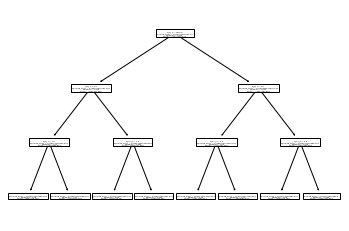

In [ ]:
#Visualising the Tree
from sklearn import tree
tree.plot_tree(dtr)

Feature Importance

In [ ]:
from sklearn.feature_selection import RFE
estimator=DecisionTreeRegressor()
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x_train,y_train)
list(zip(['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age'],selector.support_))

[('AREA', False),
 ('INT_SQFT', True),
 ('PARK_FACIL', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('House_age', False)]

'INT_SQFT','N_BEDROOM','BUILDTYPE' and 'MZZONE' are important feature considering Decision Tree Model.

**Random Forest**

Preparing the Data

In [ ]:
x=df[['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age']].values
y=df["Total_Price"].values

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

Model Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=3,max_features='sqrt')
rf.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt')

In [ ]:
y_predrf=rf.predict(x_test_scaled)
y_predrf

array([11445598.89301121, 10218366.21363108,  9621851.55537139, ...,
       11498196.47272036, 15035166.6782616 ,  9650694.42642465])

In [ ]:
df5=pd.DataFrame({'Actual':y_test,'Predicted':y_predrf})
df5

,Actual,Predicted
0,9896884,1.144560e+07
1,8684222,1.021837e+07
2,8878064,9.621852e+06
3,8613361,9.376580e+06
4,7689444,8.253730e+06
...,...,...
1759,11453777,1.285332e+07
1760,8952254,1.141560e+07
1761,14425269,1.149820e+07
1762,16035149,1.503517e+07


In [ ]:
print("R2 Score : ",metrics.r2_score(y_test,y_predrf))

R2 Score :  0.7316822748936969


Random Forest Model is a good model considering  the R2 score.

Feature Importance

In [ ]:
from sklearn.feature_selection import RFE
estimator=RandomForestRegressor()
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x_train_scaled,y_train)
list(zip(['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('PARK_FACIL', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('House_age', False)]

'AREA','INT_SQFT','BUILDTYPE','MZZONE' are important features considering the Random Forest model.

**Gradient Boosting**

Preparing the Data

In [ ]:
x=df[['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age']].values
y=df["Total_Price"].values

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Model Training

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
for lr in [0.01,0.05,0.06,0.07,0.1,0.3,0.5,0.8,0.9,1]:
  model=GradientBoostingRegressor(learning_rate=lr)
  model.fit(x_train,y_train)
  print("Learning Rate : ",lr,"Train Score : ",model.score(x_train,y_train),"Test score : ",model.score(x_test,y_test))

Learning Rate :  0.01 Train Score :  0.6997930852037753 Test score :  0.6861615952522595
Learning Rate :  0.05 Train Score :  0.9631551024019678 Test score :  0.9567129601951893
Learning Rate :  0.06 Train Score :  0.9712718274761423 Test score :  0.9654530635119809
Learning Rate :  0.07 Train Score :  0.976907321503629 Test score :  0.9714742457118671
Learning Rate :  0.1 Train Score :  0.9858705650660036 Test score :  0.9820422711883992
Learning Rate :  0.3 Train Score :  0.9956927992246755 Test score :  0.9938463737185689
Learning Rate :  0.5 Train Score :  0.9961858911788334 Test score :  0.9940409184255411
Learning Rate :  0.8 Train Score :  0.9964240388704707 Test score :  0.9929039725350179
Learning Rate :  0.9 Train Score :  0.9951140969334603 Test score :  0.9909581677373174
Learning Rate :  1 Train Score :  0.994568034450962 Test score :  0.988927011091161


In [ ]:
y_predgb=model.predict(x_test)
y_predgb

array([13089405.2105924 , 13463567.46425514, 10319162.02003862, ...,
       10032023.71521229, 15246185.57877401,  8704652.15036939])

In [ ]:
df6=pd.DataFrame({'Actual':y_test,'Predicted':y_predgb})
df6

,Actual,Predicted
0,13228220,1.308941e+07
1,13656356,1.346357e+07
2,10092812,1.031916e+07
3,15147348,1.393216e+07
4,8952254,9.485665e+06
...,...,...
1759,8750548,9.841984e+06
1760,8974943,8.571322e+06
1761,9666655,1.003202e+07
1762,15562156,1.524619e+07


In [ ]:
print("R2 Score : ",metrics.r2_score(y_test,y_predgb))

R2 Score :  0.988927011091161


Feature Importance

In [ ]:
from sklearn.feature_selection import RFE
estimator=GradientBoostingRegressor()
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x_train_scaled,y_train)
list(zip(['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('PARK_FACIL', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('House_age', False)]

'AREA','INT_SQFT','BUILDTYPE','MZZONE' are important features considering the Gradient Boosting model.

**X G BOOST MODEL**

Preparing the Data

In [ ]:
x=df[['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age']].values
y=df["Total_Price"].values

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

Model Training

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  XG = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  XG.fit(x_train,y_train) #train the model

  print("Learning rate : ", lr, " Train score : ", XG.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(XG, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.4374421602004035  Cross-Val score :  -0.4535256080421366
Learning rate :  0.02  Train score :  0.7068643155106855  Cross-Val score :  0.7001637598825549
Learning rate :  0.03  Train score :  0.9009665778716952  Cross-Val score :  0.8957140025899486
Learning rate :  0.04  Train score :  0.9452673603748579  Cross-Val score :  0.9420473769186364
Learning rate :  0.05  Train score :  0.9633603735742914  Cross-Val score :  0.959030499286416
Learning rate :  0.1  Train score :  0.9855259645158814  Cross-Val score :  0.9821753018094211
Learning rate :  0.11  Train score :  0.9874133433405589  Cross-Val score :  0.9841544091979728
Learning rate :  0.12  Train score :  0.9891970191718328  Cross-Val score :  0.9858420874332264
Learning rate :  0.13  Train score :  0.9899834967134802  Cross-Val score :  0.9873852133121298
Learning rate :  0.14  Train score :  0.9909039723241495  Cross-Val score :  0.9882199227727047
Learning rate :  0.15  Train score :  0.

With Learning rate to be 0.7, I can get the best XG boost model.

In [ ]:
 XG = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
 XG.fit(x_train,y_train)
print("R2 Score : ", XG.score(x_test,y_test))

R2 Score :  0.9925799346463733


In [ ]:
y_predxg=XG.predict(x_test)
y_predxg

array([11356020.,  9436024., 13557998., ..., 19413074., 13994712.,
       11993684.], dtype=float32)

In [ ]:
 print("R2 score of XG Boost Model :",XG.score(x_test,y_test)) 

R2 score of XG Boost Model : 0.989680172807365


Feature Importance

In [ ]:
from sklearn.feature_selection import RFE
estimator=xgb.XGBRegressor(verbosity=0)
selector=RFE(estimator,n_features_to_select=4,step=1)
selector.fit(x_train_scaled,y_train)
list(zip(['AREA','INT_SQFT','PARK_FACIL','DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'SALE_COND','BUILDTYPE','UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM', 'QS_OVERALL', 'House_age'],selector.support_))

[('AREA', False),
 ('INT_SQFT', True),
 ('PARK_FACIL', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('House_age', False)]

'INT_SQFT',N_ROOM,'BUILDTYPE' and 'MZZONE' are important features considering the XG boost model.

It can be concluded from above performed Machine Learning Algorithm that Area, square feet of the property, build type whether House,Commercial and others,Zone where the property is located plays an important role in determining the Price of the House in Chennai.